In [2]:
#Data manipulation
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preferences
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [6]:
#Read in the raw data
raw_data = pd.read_excel('Simulated Caregiving - Easy v Demanding.xlsx', sheet_name=None)
data = raw_data.copy()

#Merge all the sheets into a single dataframe and add sheet name as the "session variable
all_data=pd.DataFrame()
for k in data.keys():
    temp_df = data.get(k)
    temp_df['session'] = k
    all_data = pd.concat([all_data, temp_df])
    
# Relabeling the columns
all_data.columns = ['items', 'condition', 'interval_number', 'percent_interval_w_care', 'session']

#Reorganizing the columns
all_data = all_data[['session', 'items', 'condition', 'interval_number', 'percent_interval_w_care']].reset_index(drop=True)

#Show the dataframe
all_data

,session,items,condition,interval_number,percent_interval_w_care
0,SP2018-1,Yes,Easy,1,95
1,SP2018-1,Yes,Easy,2,5
2,SP2018-1,Yes,Easy,3,85
3,SP2018-1,Yes,Easy,4,20
4,SP2018-1,Yes,Easy,5,70
5,SP2018-1,Yes,Easy,6,35
6,SP2018-1,Yes,Demanding,7,35
7,SP2018-1,Yes,Demanding,8,30
8,SP2018-1,Yes,Demanding,9,15
9,SP2018-1,Yes,Demanding,10,30


In [7]:
#Trying something to eventually plot only the data with "no in the Items column

items_data = filter_rows_by_values(df, "items", ["yes"])

#Did this work? 

items_data

NameError: name 'filter_rows_by_values' is not defined

In [8]:
#Okay, that didn't work. Trying something else... 
# Found here: https://stackoverflow.com/questions/72587519/how-to-show-in-a-plot-only-the-values-that-match-with-a-condition-in-python
#I know this strays a bit from the code from David's repository, so it probably won't work. I'm curious. Let's try.

x = df['interval_number'].where(df['items'] == 'No')
y = df['percent_interval_w_care']

plt.plot(x, y)
plt.xlabel('Number of 5-min Intervals')
plt.ylabel('Percentage of Intervals with Care')
plt.show()

NameError: name 'df' is not defined

In [9]:
#Ah, okay, I'll try that again but a little differently. 

x = all_data['interval_number'].where(df['items'] == 'No')
y = all_data['percent_interval_w_care']

plt.plot(x, y)
plt.xlabel('Number of 5-min Intervals')
plt.ylabel('Percentage of Intervals with Care')
plt.show()

NameError: name 'df' is not defined

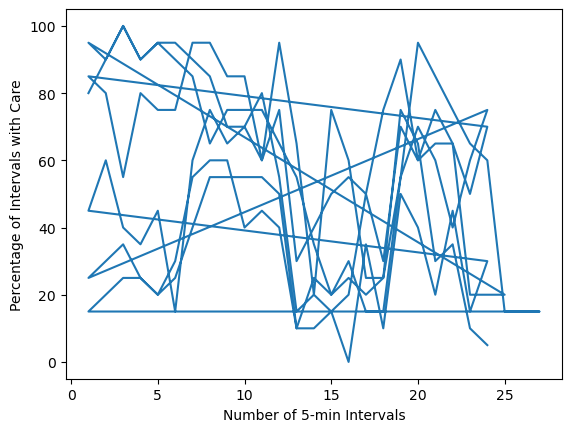

In [10]:
#ha, shoot. Again. 

x = all_data['interval_number'].where(all_data['items'] == 'No')
y = all_data['percent_interval_w_care']

plt.plot(x, y)
plt.xlabel('Number of 5-min Intervals')
plt.ylabel('Percentage of Intervals with Care')
plt.show()

In [11]:
#Whoa. Interesting. 
#Okay, I'm going to try to combine David's code with the first line for the x values... 

sns.color_palette("viridis")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    (x=('interval_number').where('items' == 'No')), 
    y='percent_interval_w_care', 
    data=all_data.sort_values(by=['condition'], ascending=False), 
    hue='condition', 
)
grouped_data = all_data[['condition', 'interval_number', 'percent_interval_w_care']].\
                groupby(['condition', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='condition', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='condition', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3160555220.py, line 7)

In [12]:
#Hm, nope. Again but a bit differently. 

#Attempting a subset dataframe with just the no rows for the items column and then plotting. 

items_data=all_data[['session', 'items', 'condition', 'interval_number', 'percent_interval_w_care',]].where['items' == 'No']

#show those data... 
items_data

TypeError: 'method' object is not subscriptable

In [13]:
#Trying again. 
items_data=all_data.where['items' == 'No']
items_data

TypeError: 'method' object is not subscriptable

In [14]:
#Ah, trying again. Per google, I should use curly rather than squared brackets. 
items_data=all_data.where('items' == 'No')
items_data

ValueError: Array conditional must be same shape as self

In [6]:
#Hm, nope. I'll try again later. 

#And, back. I'm back to the approach from #11 above, modifying something based on the error message. 

sns.color_palette("viridis")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    x=('interval_number').where('items' == 'No')), 
    y ='percent_interval_w_care', 
    data=all_data.sort_values(by=['condition'], ascending=False), 
    hue='condition', 
)
grouped_data = all_data[['condition', 'interval_number', 'percent_interval_w_care']].\
                groupby(['condition', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='condition', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='condition', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()

IndentationError: unexpected indent (138047113.py, line 9)

In [ ]:
#bah. I'm going to start again. 